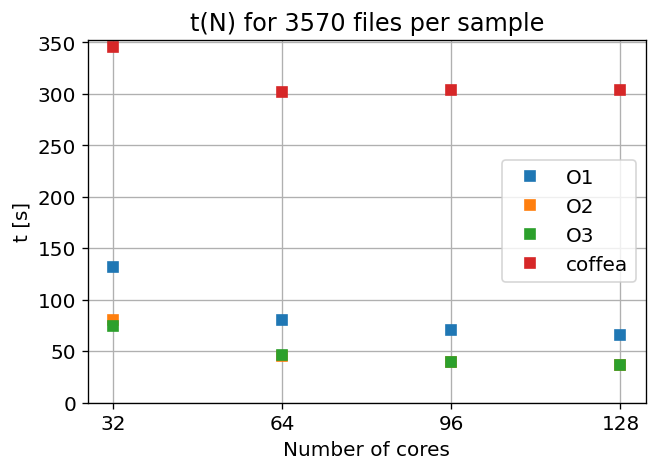

In [13]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


plt.rcParams["font.size"] = 12
plt.rcParams["figure.dpi"] = 120
n = list(range(32,129,32))

labels = ['coffea', 'O1', 'O2', 'O3']
colors = ['r', 'o', 'b', 'g']
colors = {labels[i]:colors[i] for i in range(len(labels))}
    
for label in labels:
    t = []
    for ncores in n:
        file = f'benchmarks/3750/{label}/{ncores}'
        file = file if label == 'coffea' else file + '_graphs'
        with open(file, 'r') as f:
            for line in f.readlines():
                if (label == 'coffea'):
                    if 'execution took' in line:
                        time = float(line.split()[2])
                        t.append(time)
                else:
                    if 'RunGraphs' in line and 'elapsed' in line:
                        time = float(line.split()[-2][0:-1])
                        t.append(time)
                    if 'maxresident' in line:
                        ram = int(line.split()[-1].split('maxresident')[0])

    ax.plot(n, t, marker='s', linestyle='', label = label)

ax.set_xlabel('Number of cores')
ax.set_ylabel('t [s]')
ax.grid()
ax.set_xticks(n)
ax.legend()
ax.set_title('t(N) for 3570 files per sample')
ax.set_ylim([0,352])

fig.savefig('exf4.png')